<a href="https://colab.research.google.com/github/Noh1020/mid_first_team/blob/SGNOH-branch/1950_2023_co2_%EB%B0%B0%EC%B6%9C%ED%98%84%ED%99%A9%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

# CSV 파일 로드
data = pd.read_csv("owid-co2-data.csv")

# 기준 연도를 1950년대~2023년 사이로 설정
data = data[(data['year'] >= 1950) & (data['year'] <= 2023)]

# 필요한 열만 선택
data = data[['country', 'year', 'co2']]

# 특정 국가 목록 제외
excluded_countries = [
    "World",
    "Asia",
    "Asia (excl. China & India)",
    "Africa",
    "Europe",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America",
    "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)",
    "European Union (28)",
    "High-income countries",
    "Upper-middle-income countries",
    "Lower-middle-income countries",
    "Low-income countries",
    "International transport",
    "Non-OECD (GCP)",
    "Asia (GCP)",
    "Europe (GCP)",
    "North America (GCP)",
    "South America (GCP)",
    "Oceania (GCP)",
    "OECD (GCP)",
    "Asia (excl. China and India)",
    "Middle East (GCP)",
    "Africa (GCP)",
    "International shipping",
    "International aviation"
]
data = data[~data['country'].isin(excluded_countries)]

# 국가별 1950~2024년 CO₂ 배출량 합산
total_co2_by_country = data.groupby('country')['co2'].sum().reset_index()

# CO₂ 배출량이 가장 많은 10개 국가 선택
top_20_countries = total_co2_by_country.sort_values(by='co2', ascending=False).head(20)

# 결과 출력
print(top_20_countries)

            country         co2
215   United States  342406.380
42            China  270339.214
166          Russia  115003.692
77          Germany   65902.277
99            Japan   64750.082
91            India   60932.394
214  United Kingdom   40466.855
36           Canada   30804.237
212         Ukraine   29092.540
72           France   28003.259
97            Italy   24055.233
162          Poland   23330.584
189    South Africa   20823.249
93             Iran   20322.856
129          Mexico   20293.447
190     South Korea   20093.559
178    Saudi Arabia   18194.934
11        Australia   18188.010
28           Brazil   17431.130
92        Indonesia   15889.354


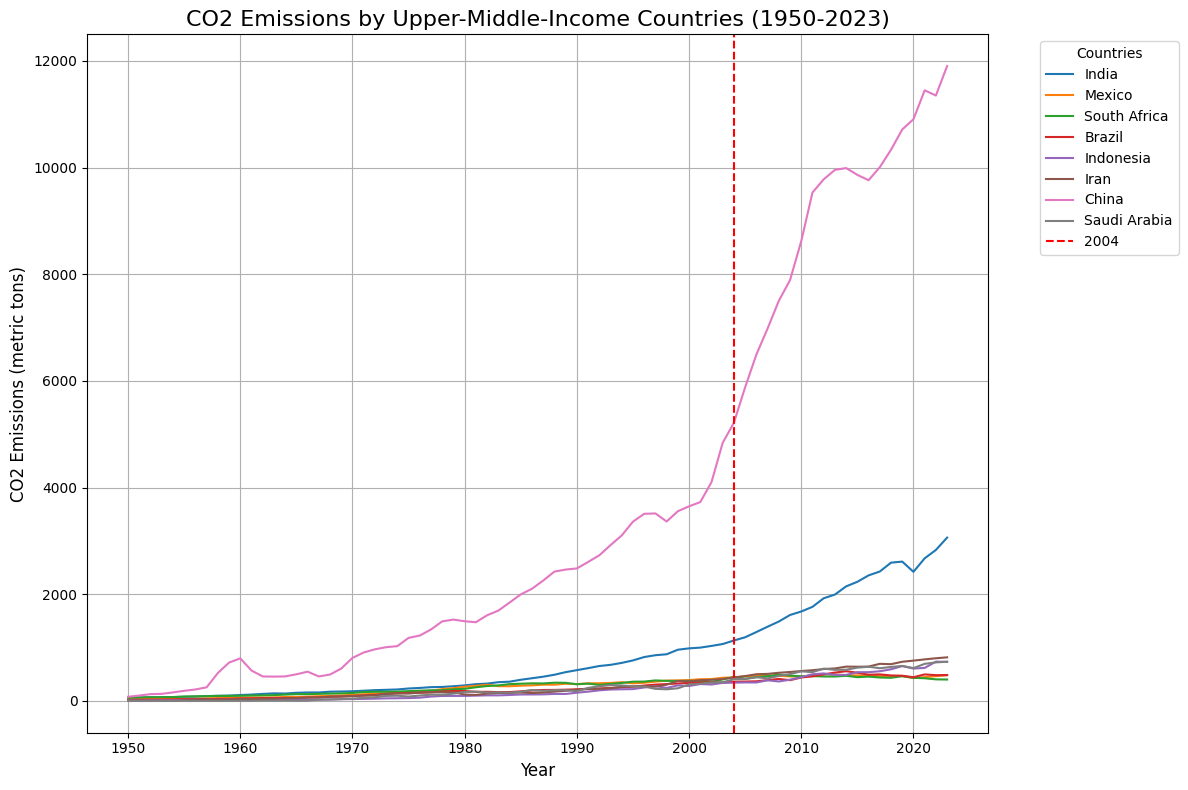

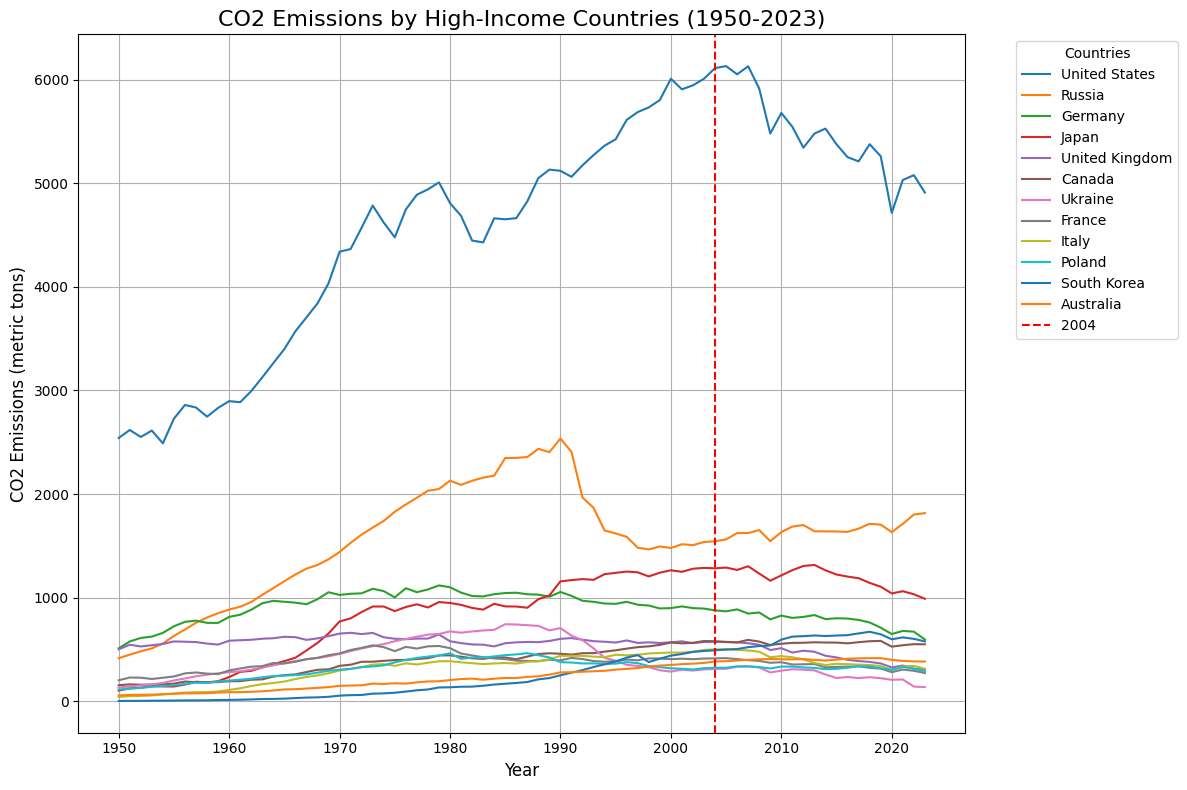

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
data = pd.read_csv("owid-co2-data.csv")

# 기준 연도를 1950년대~2023년 사이로 설정
data = data[(data['year'] >= 1950) & (data['year'] <= 2023)]

# 필요한 열만 선택
data = data[['country', 'year', 'co2']]

# 특정 국가 목록 제외
excluded_countries = [
    "World",
    "Asia",
    "Asia (excl. China & India)",
    "Africa",
    "Europe",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America",
    "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)",
    "European Union (28)",
    "High-income countries",
    "Upper-middle-income countries",
    "Lower-middle-income countries",
    "Low-income countries",
    "International transport",
    "Non-OECD (GCP)",
    "Asia (GCP)",
    "Europe (GCP)",
    "North America (GCP)",
    "South America (GCP)",
    "Oceania (GCP)",
    "OECD (GCP)",
    "Asia (excl. China and India)",
    "Middle East (GCP)",
    "Africa (GCP)",
    "International shipping",
    "International aviation"
]
data = data[~data['country'].isin(excluded_countries)]

# 국가별 1950~2024년 CO₂ 배출량 합산
total_co2_by_country = data.groupby('country')['co2'].sum().reset_index()

# CO₂ 배출량이 가장 많은 20개 국가 선택
top_20_countries = total_co2_by_country.sort_values(by='co2', ascending=False).head(20)

# 상위 20개 국가의 데이터만 필터링
top_20_data = data[data['country'].isin(top_20_countries['country'])]

# Upper-middle-income countries 목록
upper_middle_income_countries = [
    "India", "Mexico", "South Africa", "Brazil",
    "Indonesia", "Iran", "China", "Saudi Arabia"
]

# High-income countries 목록
high_income_countries = [
    "United States", "Russia", "Germany", "Japan",
    "United Kingdom", "Canada", "Ukraine", "France",
    "Italy", "Poland", "South Korea", "Australia"
]

# Upper-middle-income countries 데이터만 필터링
upper_middle_income_data = data[data['country'].isin(upper_middle_income_countries)]

# High-income countries 데이터만 필터링
high_income_data = data[data['country'].isin(high_income_countries)]

# Upper-middle-income countries 그래프 그리기
plt.figure(figsize=(12, 8))
for country in upper_middle_income_countries:
    country_data = upper_middle_income_data[upper_middle_income_data['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], label=country)

# 2004년 기준선 추가
plt.axvline(x=2004, color='r', linestyle='--', label='2004')

plt.title("CO2 Emissions by Upper-Middle-Income Countries (1950-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (metric tons)", fontsize=12)
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# High-income countries 그래프 그리기
plt.figure(figsize=(12, 8))
for country in high_income_countries:
    country_data = high_income_data[high_income_data['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], label=country)

# 2004년 기준선 추가
plt.axvline(x=2004, color='r', linestyle='--', label='2004')

plt.title("CO2 Emissions by High-Income Countries (1950-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (metric tons)", fontsize=12)
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
